# Orders Exercise

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from sklearn.metrics import confusion_matrix
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 9999)
pd.set_option('display.max_rows', 300)

In [2]:
#Import the csv file and assign it to a dataframe.
df = pd.read_csv('order_data.csv')

In [3]:
#Investigate the data type of each column
df.dtypes

customer_id           int64
gender                int64
date                 object
value               float64
predicted_gender      int64
dtype: object

In [4]:
#Check for null values in each column
df.isnull().sum()

customer_id         0
gender              0
date                0
value               0
predicted_gender    0
dtype: int64

In [5]:
#Take an initial look at the set up of the dataframe
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [6]:
df['date'] = pd.to_datetime(df['date']).dt.date #Remove the time portion of the date
df['date'] = pd.to_datetime(df['date']) #Convert the date column from a string to a date 

In [7]:
#Check that the date column type changed to a date
df.dtypes

customer_id                  int64
gender                       int64
date                datetime64[ns]
value                      float64
predicted_gender             int64
dtype: object

In [8]:
#Examine the top of the dataframe
df.head(15)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01,198.50,1
1,1001,0,2017-01-01,338.00,1
2,1002,1,2017-01-01,733.00,1
3,1003,1,2017-01-01,772.00,1
4,1004,0,2017-01-01,508.00,1
5,1005,1,2017-01-01,338.00,0
6,1006,1,2017-01-01,1526.43,1
7,1007,0,2017-01-01,168.00,0
8,1008,0,2017-01-01,207.99,0
9,1009,1,2017-01-01,283.00,1


In [9]:
#Examine the bottom of the dataframe
df.tail(15)

,customer_id,gender,date,value,predicted_gender
13456,9802,1,2017-12-31,68.00,1
13457,9803,0,2017-12-31,124.00,1
13458,9804,0,2017-12-31,162.60,0
13459,9805,1,2017-12-31,194.71,1
13460,5989,0,2017-12-31,161.79,0
13461,9286,1,2017-12-31,158.60,1
13462,9806,1,2017-12-31,375.40,1
13463,9807,0,2017-12-31,237.35,0
13464,9808,1,2017-12-31,222.76,0
13465,9809,1,2017-12-31,606.40,1


## A) Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows

In [10]:
#Examine two customer id's before grouping to use as a check
df[(df['customer_id']==8658) | (df['customer_id']==5989)]

,customer_id,gender,date,value,predicted_gender
7394,5989,0,2017-07-03,440.47,0
11748,8658,0,2017-11-19,208.00,1
11840,5989,0,2017-11-23,268.71,0
13460,5989,0,2017-12-31,161.79,0
13470,8658,0,2017-12-31,306.60,1


In [11]:
#Create a new dataframe for grouping
df_new = df.groupby(['customer_id','gender'], sort=True).agg({'date': 'last','value': 'count'})
df_new = df_new.reset_index() #Set an index for the dataframe
df_new.rename(columns={'date':'most_recent_order','value': 'total_orders',}, inplace=True) #Renamed two of the columns
df_new.head(10) #Display the first 10 rows

,customer_id,gender,most_recent_order,total_orders
0,1000,0,2017-01-01,1
1,1001,0,2017-01-01,1
2,1002,1,2017-02-19,3
3,1003,1,2017-04-26,4
4,1004,0,2017-01-01,1
5,1005,1,2017-12-16,2
6,1006,1,2017-05-09,3
7,1007,0,2017-01-01,1
8,1008,0,2017-12-17,3
9,1009,1,2017-01-01,1


In [12]:
#Examined the same customer id's to make sure the grouping and calculation worked correctly
df_new[(df_new['customer_id']==8658) | (df_new['customer_id']==5989)]

,customer_id,gender,most_recent_order,total_orders
4989,5989,0,2017-12-31,3
7658,8658,0,2017-12-31,2


## B) Plot the count of orders per week for the store

In [13]:
#Create a separate dataframe of dates and sales
sales = df[['date','value']]

In [14]:
#Set the date to be the index of the new dataframe and sort it by the date
sales.set_index('date', inplace=True)
sales.sort_index(inplace=True)

In [15]:
#Examine the new dataframe
sales.head(10)

,value
date,
2017-01-01,198.50
2017-01-01,338.00
2017-01-01,733.00
2017-01-01,772.00
2017-01-01,508.00
2017-01-01,338.00
2017-01-01,1526.43
2017-01-01,168.00
2017-01-01,207.99


In [16]:
#Set the dataframe to show sales by week
sales = sales.resample('W').sum()

In [17]:
#Examine the dataframe after setting the index and grouping sales by week
sales.head()

,value
date,
2017-01-01,6915.92
2017-01-08,54615.45
2017-01-15,90954.20
2017-01-22,127004.75
2017-01-29,73081.92


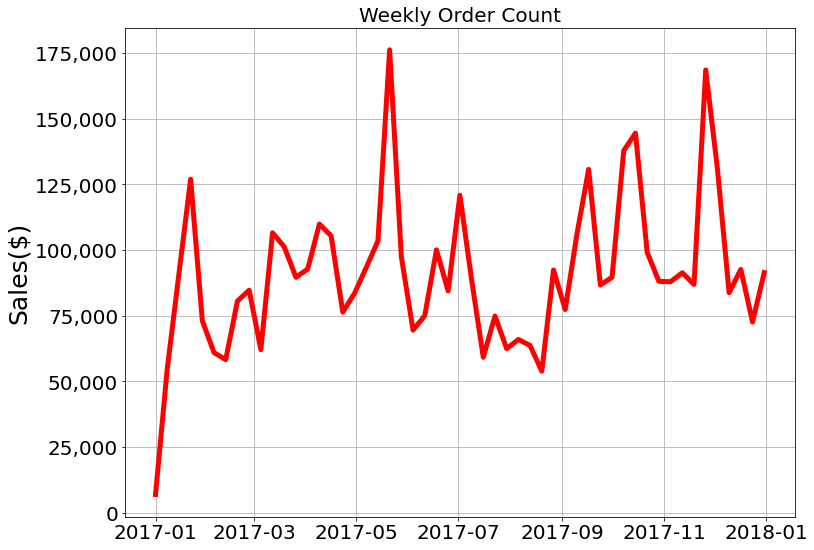

In [18]:
#Used a function to show the value columns with commas
def func(x, pos):  
   s = '{:0,d}'.format(int(x))
   return s

y_format = tkr.FuncFormatter(func)

plt.figure(figsize=(12,9))
plt.grid(b=None)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Sales($)', fontsize=25)
plt.title('Weekly Order Count',fontsize=20)
ax = plt.subplot(111)
ax.plot(sales['value'],linewidth=5,color='red');
ax.yaxis.set_major_formatter(y_format)
plt.show()

## C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

In [19]:
#Grouped by gender and calculated the mean of the value column, rounded to two places
pd.DataFrame(round(df.groupby('gender')['value'].mean(),2))

,value
gender,
0,363.89
1,350.71


In [20]:
#Calculated the t-statistic and p-value to check for signifigance
stats.ttest_ind(df[df['gender']==0]['value'],df[df['gender']==1]['value'])

Ttest_indResult(statistic=1.9757691572170935, pvalue=0.04820130539124317)

The p-value is 0.048.  Using an alpha (significance level) of 0.05, I do not think that there is  a significant difference in the mean order values for the two genders.

# D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

In [21]:
cm = confusion_matrix(df['gender'],df['predicted_gender'])
tn, fp, fn, tp = confusion_matrix(df['gender'],df['predicted_gender']).ravel()

In [22]:
print('True 0: ', tn)
print('False 1: ', fp)
print('False 0: ', fn)
print('True 1: ', tp)

True 0:  3349
False 1:  3410
False 0:  1463
True 1:  5249


In [23]:
#Classification metrics
accuracy = round((((tp+tn)/(tp+fn+tn+fp))*100),2)
misclassification = round(((1 - (accuracy/100))*100),2)
sensitivy = round(((tp/(tp+fn))*100),2)
specificity = round(((tn/(tn+fp))*100),2)
precision = round(((tp/(tp+fp))*100),2)
print('Accuracy Rate:',accuracy,'%')
print('Misclassification Rate:',misclassification,'%')
print('Sensitivy Rate:',sensitivy,'%')
print('Specificity Rate:',specificity,'%')
print('Precision Rate:',precision,'%')

Accuracy Rate: 63.83 %
Misclassification Rate: 36.17 %
Sensitivy Rate: 78.2 %
Specificity Rate: 49.55 %
Precision Rate: 60.62 %


In [24]:
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
cm_df

,Predicted 0,Predicted 1
Actual 0,3349,3410
Actual 1,1463,5249


In [25]:
#Check value counts for each of the genders
pd.DataFrame(df['gender'].value_counts())

,gender
0,6759
1,6712


The accuracy score is about 64%.  Depending on your tolerance this may be a good score.  If possible, I might prefer to see a score closer to 80%.  Looking at the confusion matrix table, it appears that the model does a better job of predicting gender class 1 than it does predicting class 0.  The model correctly predicts class 0 about 50% of the time while it correctly predicts class 1 about 78% of the time.  I would want to further investigate why the model is better at predicting one class over the other especially because the classes are roughly balanced (there is very little bias to one class over the other).